In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
core_data = pd.read_csv('data_repeat/kepler_node_core_joules_total_2023-12-31 18:01:21.089221.csv')
dram_data = pd.read_csv('data_repeat/kepler_node_dram_joules_total_2024-01-01 11:47:01.191090.csv')
package_data = pd.read_csv('data_repeat/kepler_node_package_joules_total_2024-01-01 11:47:02.156696.csv')

In [3]:
default_start_time = '2023-12-31 10:30:00'
default_end_time = '2023-12-31 11:34:00'

peaks_start_time = '2023-12-31 11:40:00'
peaks_end_time = '2023-12-31 12:35:00'

nodes = ['10.242.64.8', '10.242.64.10']

In [18]:
def get_energy(start, end, data):
    energy = data[data['timestamp'] < end]
    energy = energy[energy['timestamp'] > start]
    if len(energy) == 0:
        return 0
    used_energy = 0
    for node in nodes:
        node_energy = energy[energy['instance'] == node]
        node_energy.reset_index(inplace=True, drop=True)
        used_energy += node_energy['value'][len(node_energy)-1] - node_energy['value'][0]
    return used_energy

In [19]:
core = get_energy(default_start_time, default_end_time, core_data)
dram = get_energy(default_start_time, default_end_time, dram_data)
package = get_energy(default_start_time, default_end_time, package_data)

total_default = core + dram + package

In [20]:
core = get_energy(default_start_time, default_end_time, core_data)
dram = get_energy(default_start_time, default_end_time, dram_data)
package = get_energy(default_start_time, default_end_time, package_data)

total_default = core + dram + package
print(f'Core : {core}\nDram : {dram}\nPackage : {package}')
print(f'Total : {total_default}')

Core : 53752.66200000048
Dram : 2889.515999999945
Package : 17917.55400000047
Total : 74559.73200000089


In [21]:
core = get_energy(peaks_start_time, peaks_end_time, core_data)
dram = get_energy(peaks_start_time, peaks_end_time, dram_data)
package = get_energy(peaks_start_time, peaks_end_time, package_data)

total_peaks = core + dram + package
print(f'Core : {core}\nDram : {dram}\nPackage : {package}')
print(f'Total : {total_peaks}')

Core : 51389.9820000045
Dram : 2901.3989999998594
Package : 17992.87800000049
Total : 72284.25900000485


In [22]:
percentage = (total_default - total_peaks)/total_default * 100
print(f'Percentage energy saving : {percentage}')

Percentage energy saving : 3.0518792637237655


In [34]:
default_exps = int((pd.to_datetime(default_end_time) - pd.to_datetime(default_start_time))/pd.Timedelta(minutes=5)) + 2
peaks_exps = int((pd.to_datetime(peaks_end_time) - pd.to_datetime(peaks_start_time))/pd.Timedelta(minutes=5)) + 2

default_w = [str(pd.to_datetime(default_start_time) + i * pd.Timedelta(minutes=5)) for i in range(1, default_exps)]
peaks_w = [str(pd.to_datetime(peaks_start_time) + i * pd.Timedelta(minutes=5)) for i in range(1, peaks_exps)]

In [35]:
default_energy = []
peaks_energy = []

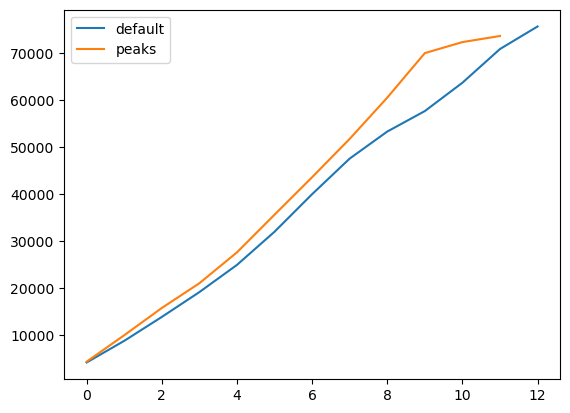

In [36]:
for time in default_w:
    core = get_energy(default_start_time, time, core_data)
    dram = get_energy(default_start_time, time, dram_data)
    package = get_energy(default_start_time, time, package_data)
    default_energy.append(core + dram + package)
for time in peaks_w:
    core = get_energy(peaks_start_time, time, core_data)
    dram = get_energy(peaks_start_time, time, dram_data)
    package = get_energy(peaks_start_time, time, package_data)
    peaks_energy.append(core + dram + package)
plt.plot(default_energy)
plt.plot(peaks_energy)
plt.legend(['default', 'peaks'])

In [39]:
default_energy

[4195.674000000581,
 8791.830000002286,
 13872.860999997822,
 19150.87200000172,
 24929.291999998735,
 31980.830999997794,
 39959.94899999874,
 47525.594999998226,
 53270.01600000088,
 57623.748000000836,
 63644.753999998095,
 70809.93299999856,
 75602.6070000002]

In [40]:
peaks_energy

[4368.3090000025695,
 9984.735000003944,
 15775.419000000926,
 21032.70900000329,
 27595.54499999981,
 35603.6910000022,
 43563.801000000676,
 51715.00200000277,
 60478.8720000044,
 69944.10000000638,
 72284.25900000485,
 73578.36600000376]